### Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.



Ans:   
If given two matrices with size (n,k) and (k,m), respectively, the number of multiplications performed will be n𝙭m𝙭k and number of additions will be n𝙭m𝙭(k-1).

Explaination:  
Let result matrix be C(n,m) and input matrix be A(n,k) and B(k,m)
The resultant matrix formed will be of size (n,m), meaning the total terms will be n𝙭m in the matrix. If we find out the number of multiplication and addition required for one tern, we have to multiply it by the total number of terms to get final answer.
For calculating C[1][1], we multiply the first row of A with 1st column of B with respective terms and add them to get . A row of A or column of B has k terms. So we multiply k terms, meaning multiplication if performed k times. We add the k terms that we multiplied, so addition is performed (k-1) times. Now we simply perform these steps for all the n𝙭m terms.

### Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [ ]:
import time
import numpy as np

let n = 3, k = 4, m = 5   
So A(3,4) and B(4,5)   
So C(3,5)

In [ ]:
n=30
k=40
m=50

A = [[1]*k]*n
B = [[1]*m]*k
C = [[0]*m]*n

#record the start time
start_time = time.time()


for i in range(len(A)):
  for j in range(len(B[0])):
    for k in range(len(B)):
      C[i][j] += A[i][k] * B[k][j]

# record end time
end_time = time.time()
print(end_time - start_time)

0.02445220947265625


In [ ]:
A1 = np.array(A)
B1 = np.array(B)

start_time1 = time.time()
C1 = np.dot(A1,B1)

end_time1 = time.time()
print(end_time1 - start_time1)

0.000240325927734375


Hence we can see that NumPy is faster than Python lists for matrix multiplication. One of the reasons is that NumPy uses optimized C libraries for numerical operation, which are low level operations and hence faster.
Numpy performs operations on entire arrays at once by vectorizaion, not element-by-element, which reduces time.Arrays are also stored in contiguous memory blocks, making data access faster.


### Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [ ]:
import numpy as np
import time

In [ ]:
def median(array):
  sorted_array = sorted(array)
  n = len(sorted_array)
  mid = n//2
  if n % 2 == 0:
    return (sorted_array[mid-1] + sorted_array[mid])/2
  else:
    return sorted_array[mid]

In [ ]:
def med_quick(array):
  def quickselect(array, k):
    if len(array) == 1:
      return array[0]

    pivot = array[len(array)//2]
    left = [x for x in array if x < pivot]
    right = [x for x in array if x > pivot]
    pivots = [x for x in array if x == pivot]

    if k <= len(left):
      return quickselect(left, k)
    elif k< len(left) + len(pivots):
      return pivots[0]
    else:
      return quickselect(right, k - len(left) - len(pivots))

  if len(array) % 2 == 1:
    return quickselect(array, len(array)//2)
  else:
    return (quickselect(array, len(array)//2 - 1) + quickselect(array, len(array)//2 + 1))/2

In [ ]:
np.random.seed(0)
array = np.random.randint(1,500,size = 1000).tolist()

start_time = time.time()
print('Using Sorting: ', median(array))
end_time = time.time()
print(end_time - start_time, '\n')

start_time1 = time.time()
print('Using Quickselect: ', med_quick(array))
end_time1 = time.time()
print(end_time1 - start_time1, '\n')

start_time2 = time.time()
print('using numpy.median: ', np.median(array))
end_time2 = time.time()
print(end_time2 - start_time2)

Using Sorting:  248.0
0.0050318241119384766 

Using Quickselect:  248.0
0.0037140846252441406 

using numpy.median:  248.0
0.0013430118560791016


Hence we can say that Quickselect is more efficient for sorting arrays rather than using sort function. However, numpy.median is more efficient as it is highly optimized.

### Question 4. What is the gradient of the following function with respect to x and y?
$x^2y + y^3\sin(x)$

Partial derivative of the function wrt $x$ will be $2xy +  y^3cos(x)$   
Partial derivative wrt y will be $x^2 + 3y^2sin(x)$   
Hence, gradient of the given function is $(2xy + y^3cos(x),x^2 + 3y^2sin(x))$

### Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [48]:
!pip install jax

In [58]:
import jax
import jax.numpy as jnp

In [64]:
def f(x,y):
  return (x**2)*y + (y**3)*jnp.sin(x)

grad_f = jax.grad(f, argnums=(0,1))
gradient_x = grad_f(20.0, 24.0)[0]
gradient_y = grad_f(20.0, 24.0)[1]
print(gradient_x)
print(gradient_y)

6601.3267
1977.5695


In [55]:
print(grad_f(20.0, 24.0))

(Array(6601.3267, dtype=float32, weak_type=True), Array(1977.5695, dtype=float32, weak_type=True))


### Q6. Use sympy to confirm that you obtain the same gradient analytically.

In [56]:
!pip install sympy

In [57]:
import sympy as sp

x = sp.Symbol('x')
y = sp.Symbol('y')

f = (x**2)*y + (y**3) * sp.sin(x)
print(sp.diff(f,x))
print(sp.diff(f,y))

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


### Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [ ]:
record = {
    2022: {
        'Branch 1':{
            'Roll No': 1,
                'Name': 'N',
                'Marks': {
                    'Maths': 100,
                    'English': 70
                }
            },
        'Branch 2': {}
            },
    2023: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2024: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2025: {
        'Branch 1': {},
        'Branch 2' :{}
        }
    }
print(record)

{2022: {'Branch 1': {'Roll No': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}, 'Branch 2': {}}, 2023: {'Branch 1': {}, 'Branch 2': {}}, 2024: {'Branch 1': {}, 'Branch 2': {}}, 2025: {'Branch 1': {}, 'Branch 2': {}}}


### Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [65]:
class Student:
  def __init__(self, roll_no, name, marks):
    self.roll_no = roll_no
    self.name = name
    self.marks = marks

  def __repr__(self):
    return f'{self.roll_no} {self.name} {self.marks}'

class Branch:
  def __init__(self, name):
    self.name = name
    self.students = []

  def add_student(self, student):
    self.students.append(student)

  def __repr__(self):
    return f"Branch(Name: {self.name}, Students: {self.students})"

class Year:
  def __init__(self, year):
    self.year = year
    self.branches = []

  def add_branch(self, branch):
    self.branches.append(branch)

  def __repr__(self):
    return f'Year(Year: {self.year}, Branches: {self.branches})'


In [66]:
A = Student(1, 'A', {'Maths': 100, 'English': 70} )
branch1 = Branch('branch1')
branch1.add_student(A)
year1 = Year(2024)
year1.add_branch(branch1)
print(year1)

Year(Year: 2024, Branches: [Branch(Name: branch1, Students: [1 A {'Maths': 100, 'English': 70}])])


### Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(0.5,101,0.5)

#### $y = x$

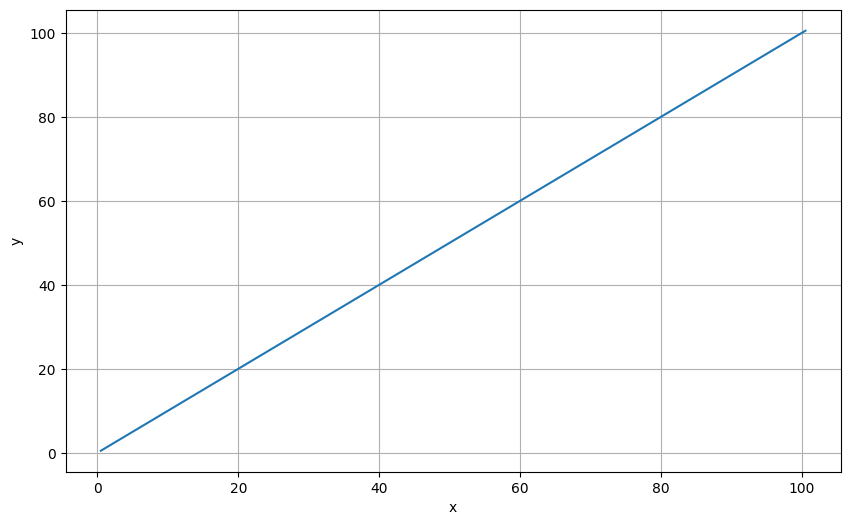

In [ ]:
y1 = x

plt.figure(figsize=(10,6))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(x, y1, label='y = x')

#### $y=x^2$

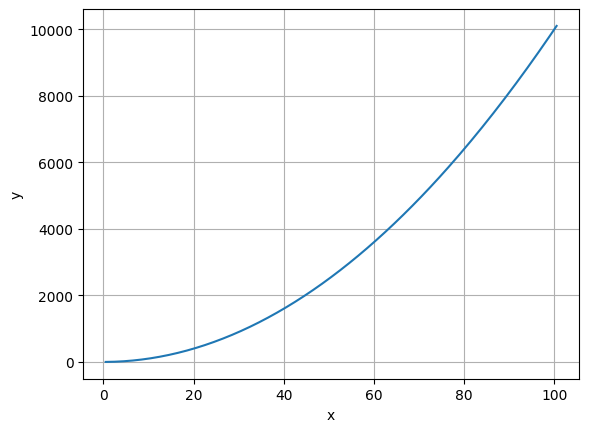

In [ ]:
y2 = x**2
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(x, y2, label='y = x^2')

#### $y=x^3/100$

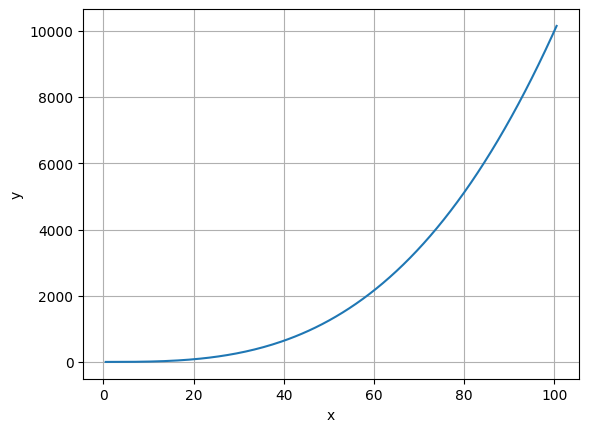

In [ ]:
y3 = (x**3)/100
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(x, y3, label='y = x^3/100')

#### $y=sin(x)$

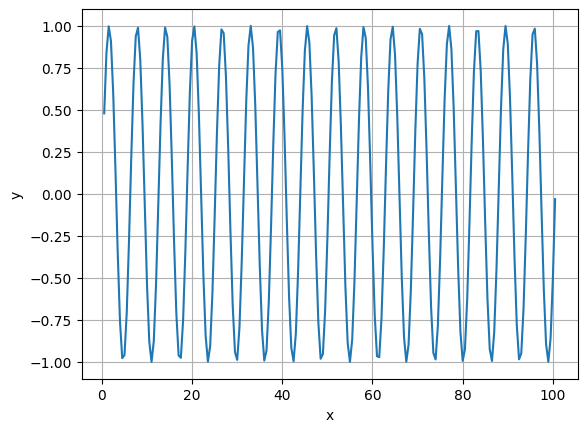

In [ ]:
y4 = np.sin(x)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(x, y4, label='y = sin(x)')

#### $y=sin(x)/x$

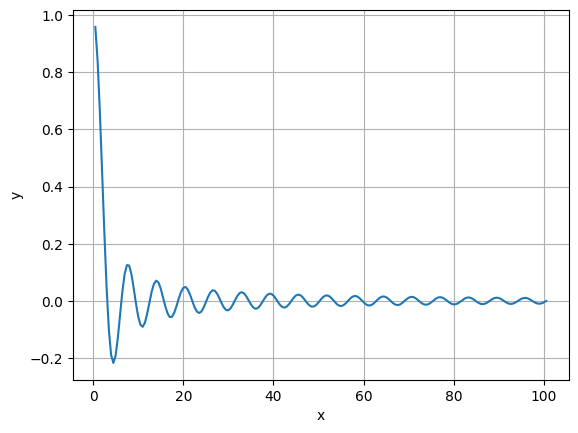

In [ ]:
y5 = (np.sin(x))/x
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(x, y5, label='y = sin(x)/x')

#### $y=log(x)$

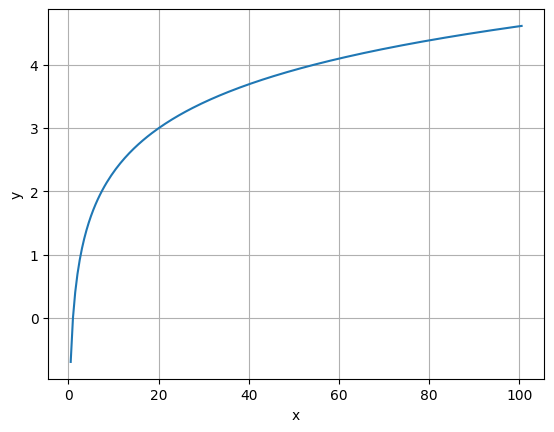

In [ ]:
y6 = np.log(x)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(x, y6, label='y = log(x)')

#### $y=e^x$

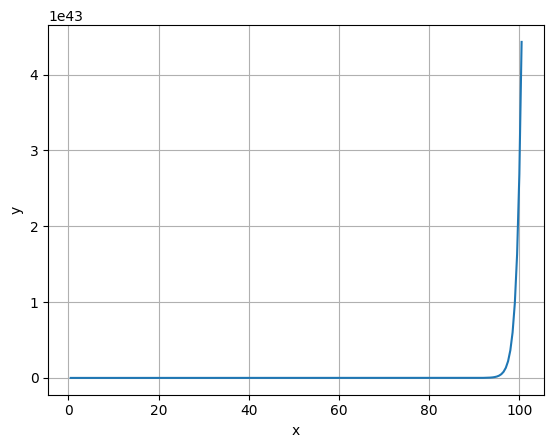

In [ ]:
y7 = np.exp(x)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(x, y7, label='y = e^x')

### Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [ ]:
from os import lchown
import numpy as np
import pandas as pd

aray = np.random.uniform(1,2,(20,5))
print(aray)
print()
df = pd.DataFrame(aray, columns=['a','b','c','d','e'])
print(df)
print()
highest_std = df.std().idxmax()
lowest_mean = df.mean(axis=1).idxmin()
print(highest_std, lowest_mean)

[[1.34847599 1.74009753 1.68051448 1.62238443 1.7105284 ]
 [1.20492369 1.34169811 1.67624248 1.87923476 1.54367805]
 [1.28269965 1.03023526 1.71033683 1.0078841  1.37267907]
 [1.53053721 1.92211146 1.08949455 1.40594232 1.0243132 ]
 [1.34261098 1.62223106 1.27906795 1.20974995 1.11570323]
 [1.57714024 1.69527001 1.67195714 1.94886102 1.00270321]
 [1.64719665 1.60039224 1.58873961 1.96277032 1.01687167]
 [1.69648243 1.81367865 1.5098072  1.33396487 1.79084016]
 [1.09724293 1.44203564 1.51995237 1.69395641 1.09088573]
 [1.2277595  1.41030156 1.62329467 1.88696078 1.61882617]
 [1.13346147 1.98058013 1.87178573 1.50272076 1.92234798]
 [1.54138079 1.92330607 1.82989737 1.96828641 1.91978281]
 [1.03603382 1.174772   1.38913468 1.9521427  1.30002892]
 [1.16046764 1.88630467 1.44639442 1.90787559 1.16023047]
 [1.66111751 1.44026375 1.07648677 1.69646314 1.24739876]
 [1.03961552 1.0599443  1.06107854 1.90773296 1.73988392]
 [1.89806236 1.67258231 1.52893993 1.30444636 1.99796225]
 [1.36218906 1

### Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [ ]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
print(df)

           a         b         c         d         e         f
0   1.348476  1.740098  1.680514  1.622384  1.710528  8.102001
1   1.204924  1.341698  1.676242  1.879235  1.543678  7.645777
2   1.282700  1.030235  1.710337  1.007884  1.372679  6.403835
3   1.530537  1.922111  1.089495  1.405942  1.024313  6.972399
4   1.342611  1.622231  1.279068  1.209750  1.115703  6.569363
5   1.577140  1.695270  1.671957  1.948861  1.002703  7.895932
6   1.647197  1.600392  1.588740  1.962770  1.016872  7.815970
7   1.696482  1.813679  1.509807  1.333965  1.790840  8.144773
8   1.097243  1.442036  1.519952  1.693956  1.090886  6.844073
9   1.227760  1.410302  1.623295  1.886961  1.618826  7.767143
10  1.133461  1.980580  1.871786  1.502721  1.922348  8.410896
11  1.541381  1.923306  1.829897  1.968286  1.919783  9.182653
12  1.036034  1.174772  1.389135  1.952143  1.300029  6.852112
13  1.160468  1.886305  1.446394  1.907876  1.160230  7.561273
14  1.661118  1.440264  1.076487  1.696463  1.247399  7

In [ ]:
df['g'] = df['f'].apply(lambda x: 'LT8' if x < 8 else 'GT8')

rows_lt8 = df[df['g'] == 'LT8'].shape[0]

std_f_lt8 = df[df['g'] == 'LT8']['f'].std()
std_f_gt8 = df[df['g'] == 'GT8']['f'].std()

print('Number of rows in g with value = LT8:', rows_lt8)
print('Standard deviation of f for rows with g = LT8:', std_f_lt8)
print('Standard deviation of f for rows with g = GT8:', std_f_gt8)

Number of rows in g with LT8: 15
Standard deviation of f for rows with g = LT8: 0.47363299321498037
Standard deviation of f for rows with g = GT8: 0.4344162170182693


### Q12. Write a small piece of code to explain broadcasting in numpy.

---



 Broadcasting allows perform arithmetic operations on arrays of different shapes or dimenshions such that it makes the smaller array of the same dimension as the larger array. This is done without making explicit copies of the data, leading to efficient computation.

In [ ]:
array1 = np.array([1,2,3])
array2 = np.array([[4], [5], [6]])
result = array1 + array2
print(result)

[[5 6 7]
 [6 7 8]
 [7 8 9]]


Here, array1 is of size (1,3) and array 2 of size (3,1). So array1 changes its shape to (3,3) in the form of array1 = [[1,2,3],[1,2,3], [1,2,3]] and array2changes shape from (3,1) to (3,3) such that array2 = [[4,4,4],[5,5,5],[6,6,6]] and they add to give the resultant matrix.  

### Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [42]:
import numpy as np
def argmin_2(array):
  if len(array) == 0:
    raise ValueError('Array is empty')

  mid_index = 0
  mid_value = array[0]
  for i in range(1, len(array)):
    if array[i] < mid_value:
      mid_value = array[i]
      mid_index = i
  return mid_index

In [47]:
array = np.random.randint(1,100,50)
print(array)
print('Custom argmin value: ',argmin_2(array))
print('Numpy argmin value: ', np.argmin(array))

[ 4 91 47 30  3  6 72 16 79 36 53  8 52 52 30 56 12 68 78 56 89 69 87 58
 94 12 79 83 90  4 38  8 30 79 12 74 12 17 61 64 60  2 19 54 29 65 86 89
 74  9]
Custom argmin value:  41
Numpy argmin value:  41
